In [14]:
from tensorflow.keras.layers import Layer, BatchNormalization, Conv2D, Dense, Flatten, Add, Dropout, BatchNormalization,Conv1D,MaxPooling1D
import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras import Input, layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import time
import cv2
import random

In [2]:
#SET 1:
set_1_ind =[[2,14,15,16,18,19,20,21,24,25,26,27,28,32,40,41,42,43,44,45,46,47,48,49,50],
[ 1,6,7,8,9,10,11,12,13,23,24,25,27,28,29,30,31,32,33,34,35,44,45,47,48],
[2,3,4,11,12,15,16,17,18,20,21,27,29,30,31,32,33,34,35,36,42,44,46,49,50],[ 1,7,8,9,10,11,12,13,14,16,17,18,22,23,24,26,29,31,35,36,38,39,40,41,42]]


#SET 2:
set_2_ind = [[1,3,4,5,6,7,8,9,10,11,12,13,17,22,23,29,30,31,33,34,35,36,37,38,39], [2,3,4,5,14,15,16,17,18,19,20,21,22,26,36,37,38,39,40,41,42,43,46,49,50], 
[1,5,6,7,8,9,10,13,14,19,22,23,24,25,26,28,37,38,39,40,41,43,45,47,48], [2,3,4,5,6,15,19,20,21,25,27,28,30,32,33,34,37,43,44,45,46,47,48,49,50]]

set_name = ["handShake", "highFive", "hug", "kiss"]


set_1 = [f'{set_name[c]}_{i:04d}.avi' for c in range(len(set_name)) for i in set_1_ind[c]]
set_1_label =[f'{set_name[c]}' for c in range(len(set_name)) for i in set_1_ind[c]]

set_2 = [f'{set_name[c]}_{i:04d}.avi' for c in range(len(set_name)) for i in set_2_ind[c]]
set_2_label =[f'{set_name[c]}' for c in range(len(set_name)) for i in set_2_ind[c]]

set_2 = [f'{set_name[c]}_{i:04d}.avi' for c in range(len(set_name)) for i in set_2_ind[c]]
set_2_label =[f'{set_name[c]}' for c in range(len(set_name)) for i in set_2_ind[c]]

# note that we ignore the negative / not found founds

print(f'Set 2 to be used for train and validation \n\t{len(set_2)}/{set_2} ')


Set 2 to be used for train and validation 
	100/['handShake_0001.avi', 'handShake_0003.avi', 'handShake_0004.avi', 'handShake_0005.avi', 'handShake_0006.avi', 'handShake_0007.avi', 'handShake_0008.avi', 'handShake_0009.avi', 'handShake_0010.avi', 'handShake_0011.avi', 'handShake_0012.avi', 'handShake_0013.avi', 'handShake_0017.avi', 'handShake_0022.avi', 'handShake_0023.avi', 'handShake_0029.avi', 'handShake_0030.avi', 'handShake_0031.avi', 'handShake_0033.avi', 'handShake_0034.avi', 'handShake_0035.avi', 'handShake_0036.avi', 'handShake_0037.avi', 'handShake_0038.avi', 'handShake_0039.avi', 'highFive_0002.avi', 'highFive_0003.avi', 'highFive_0004.avi', 'highFive_0005.avi', 'highFive_0014.avi', 'highFive_0015.avi', 'highFive_0016.avi', 'highFive_0017.avi', 'highFive_0018.avi', 'highFive_0019.avi', 'highFive_0020.avi', 'highFive_0021.avi', 'highFive_0022.avi', 'highFive_0026.avi', 'highFive_0036.avi', 'highFive_0037.avi', 'highFive_0038.avi', 'highFive_0039.avi', 'highFive_0040.avi', 'h

In [3]:
def return_processed_middle_frame(set_, set_idx, dim):
    cap = cv2.VideoCapture(f"tv_human_interactions_videos/{set_[set_idx]}")
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    middle_frame = int(length / 2)
    cap.set(1, middle_frame)
    ret, frame = cap.read()
    frame = frame / 255.0
    frame = cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)
    return frame

def preprocess_labels(labels):
    train_labels_names = set(labels)
    #train_labels_nums = [i for i in range(len(train_labels_names))]
    train_labels_y = []

    train_labels_names = list(train_labels_names)

    for class_name in labels:
        i = train_labels_names.index(class_name)
        train_labels_y.append(i)

    return np.array(train_labels_y)

In [4]:
import numpy as np
import cv2 as cv

def denseOpticalFlow(set_, set_idx, num_frames,dim ,show = False):


    cap = cv2.VideoCapture(f"tv_human_interactions_videos/{set_[set_idx]}")
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    middle_frame = int(length / 2)
    cap.set(1, middle_frame)
    ret, frame1 = cap.read()
    
    prvs = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
    hsv = np.zeros_like(frame1)
    hsv[..., 1] = 255
    i =0

    out = np.zeros((dim[0],dim[1],3,num_frames))
    while(i<num_frames):
        ret, frame2 = cap.read()
        if not ret:
            print('No frames grabbed!')
            break
        next = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
        flow = cv.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        mag, ang = cv.cartToPolar(flow[..., 0], flow[..., 1])
        hsv[..., 0] = ang*180/np.pi/2
        hsv[..., 2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
        bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
        
        if(num_frames>1):
            bgr = cv2.resize(bgr, dim, interpolation=cv2.INTER_AREA)
            out[:,:,:,i] = bgr
        i+=1
        if(show):
            cv.imshow("Frame", bgr)
            cv.waitKey(50)
    # print(f"Out: {i}")

    bgr = cv2.resize(bgr, dim, interpolation=cv2.INTER_AREA)
    if(i>1):
        return out
        
    return bgr



In [89]:
width =112
height = 112

def get_model(input_shape, outputShape,opt, lossFunc):
    x = Input(shape=input_shape)
    # h = Conv1D(1, 3, activation='relu',input_shape=input_shape)(x)
    if(len(input_shape)>=4):
            h = Conv2D(filters=1, kernel_size=1, activation='relu', input_shape=(input_shape))(x)
            # h = tf.squeeze(h,-1)
            # h = tf.keras.backend.permute_dimensions(h,(0,2,3,1))

    else:
        h = Conv2D(32, padding='same', kernel_size=(3,3), activation='relu')(x)
        h = Conv2D(32, padding='same', kernel_size=(3,3), activation='relu')(x)


    # h = Conv2D(32, padding='same', kernel_size=(3,3), activation='relu')(x)
    # h = Conv2D(32, padding='same', kernel_size=(3,3), activation='relu')(x)
    h = MaxPooling2D(pool_size=(2,2))(h)
    h = Conv2D(64, padding='same', kernel_size=(3,3), activation='relu')(h)
    h = Conv2D(64, padding='same', kernel_size=(3,3), activation='relu')(h)
    h = MaxPooling2D(pool_size=(2,2))(h)
    # h = Dropout(.3)(h)
    h = Conv2D(128, kernel_size=(3,3), activation='relu')(h)
    h = Conv2D(128, kernel_size=(3,3), activation='relu')(h)
    h = MaxPooling2D(pool_size=(2,2))(h)
    h = Flatten()(h)
    h = Dense(128, activation='relu')(h)
    h = Dropout(.5)(h)
    output = Dense(outputShape, activation='softmax')(h)

    model = tf.keras.Model(inputs=x, outputs=output)
    
    model.compile(optimizer=opt, # 'adam'
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # 
             metrics=['accuracy'])
    return model
 
# benchmark_model.summary()



In [63]:
# def get_model(input_shape, outputShape,opt, lossFunc):
#     x = Input(shape=input_shape)
#     h = Conv1D(filters=1, kernel_size=1, activation='relu', input_shape=(input_shape))(x)
#     print(h.shape)
#     h = tf.squeeze(h,-1)
#     print(h.shape)
#     # h = tf.keras.layers.Concatenate()([h[0], h[2:3,], h[1]])
#     h = Conv2D(64, padding='same', kernel_size=(3,3), activation='relu')(h)
#     h = MaxPooling1D(pool_size=2)(h)
#     h = Conv2D(128, kernel_size=(3,3), activation='relu')(h)
#     h = Conv2D(128, kernel_size=(3,3), activation='relu')(h)
#     h = MaxPooling1D(pool_size=2)(h)
#     h = Flatten()(h)
#     output = Dense(outputShape, activation='softmax')(h)


#     model = tf.keras.Model(inputs=x, outputs=output)
    
#     model.compile(optimizer=opt, # 'adam'
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # 
#              metrics=['accuracy'])
#     return model
 
# benchmark_model = get_model((3,width, height, 3), 4,'adam', 'categorical_crossentropy') # len(train_labels)


In [64]:

train_images_TV = [denseOpticalFlow(set_2, set_idx,1, (112,112), show = False) for set_idx in range(len(set_2))]
train_images_TV = np.array(train_images_TV)


test_images_TV = [denseOpticalFlow(set_1, set_idx,1, (112,112),show = False) for set_idx in range(len(set_1))]
test_images_TV = np.array(test_images_TV)


In [67]:
train_images_TV = [denseOpticalFlow(set_2, set_idx,3, (112,112), show = False) for set_idx in range(len(set_2))]
train_images_TV = np.array(train_images_TV)

test_images_TV = [denseOpticalFlow(set_1, set_idx,3, (112,112),show = False) for set_idx in range(len(set_1))]
test_images_TV = np.array(test_images_TV)


In [16]:
train_images_TV.shape

(100, 112, 112, 3, 3)

In [68]:
s = np.arange(train_images_TV.shape[0])
np.random.shuffle(s)

train_images_TV = train_images_TV[s,:,:,:,:]

val = 0.2

valint = int(train_images_TV.shape[0]*val)

valTrain = train_images_TV[:valint,:,:,:,:]
xtrain = train_images_TV[valint:,:,:,:,:]

In [69]:
test_labels_y_TV = preprocess_labels(set_1_label)
train_labels_y_TV = preprocess_labels(set_2_label)

yshuffle = train_labels_y_TV[s]

ytrain = yshuffle[valint:]
yval = yshuffle[:valint]

In [ ]:
xtrain.shape

(80, 112, 112, 3, 3)

In [ ]:
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', 600,600)


cv.imshow("image",xtrain[0,:,:,:])
cv.waitKey(0)

KeyboardInterrupt: 

In [88]:
benchmark_model = get_model((width, height, 3,3), 4,'adam', 'categorical_crossentropy') # len(train_labels)


history = benchmark_model.fit(xtrain,ytrain , epochs=20, batch_size=32, validation_data=(valTrain, yval))

_, test_acc = benchmark_model.evaluate(test_images_TV, test_labels_y_TV, verbose=2)
print(test_acc)

ValueError: Input 0 of layer "max_pooling2d_55" is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, 112, 112, 3, 20)

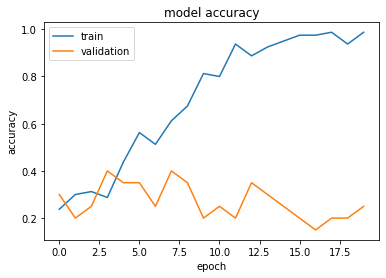

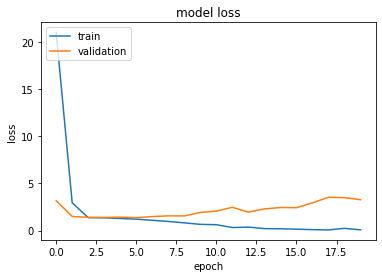

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()